## 3D CNN Instance Segmentation of Proteins in Cryo-ET Tomograms (Inference / Prediction)

This tutorial walks you through the process of using trained 3D U-Nets for instance segmentation of proteins within Cryo-ET tomograms. The implementation leverages the CoPick file management system for streamlined data handling.

The tutorial is structured into three main components:

1. (Step3) Inference: Utilize the trained DeepFindET model to generate segmentation masks for proteins within the tomograms.
2. (Step4) Localization: Extract and determine the 3D coordinates of proteins from the generated segmentation masks.
3. (Step5) Evaluation: Assess the accuracy and quality of the predicted protein coordinates.

By following this tutorial, you will be able to segment tomograms with trained DeepFindET models and extract 3D coordinates of proteins for sub-tomogram averaging.

#### Step 3: Perform Inference on Test Dataset and Evaluate Results 

With a trained model in hand, it's time to move forward with making predictions. In this step, you will execute model inference using a checkpoint from a saved epoch, allowing you to evaluate the model's performance on your test dataset.

In [1]:
from deepfindET.entry_points import step3
from deepfindET.utils import copick_tools
import matplotlib.pyplot as plt
import numpy as np
import copick

%matplotlib inline

################## Input Parameters #################

# Copick Configuration File
config = 'config_10439.json'

# Model Parameters
n_class = 8                 # Number of classes to predict.
patch_size = 160            # Size of the input patch fed into the model for inference.
model_name = 'res_unet'     # The model architecture used for training.
filters = [48, 64, 128]      # Number of filters for U-Net (same parameter as used for training).
dropout = 0                 # Dropout rate applied during inference.

# Path to the pre-trained model weights for the chosen architecture.
model_weights = 'train_results4/net_weights_FINAL.h5'

# Query for Tomogram
voxel_size = 10             # Resolution of the tomogram in voxel size.
tomogram_algorithm = 'wbp'  # Reconstruction algorithm used for generating the tomogram

# Output Segmentation Write Name
segmentation_name = 'predict'
session_id = '2'
user_id = 'deepfindET'

######################################################

2024-09-07 10:46:44.080230: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-07 10:47:05.543150: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-07 10:47:11.923820: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-07 10:47:14.554951: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-07 10:47:27.722723: I tensorflow/core/platform/cpu_feature_guar

Now let's use our model to create some segmentation predictions. In this notebook, we'll use the function, but for those interested, the equivalent CLI command is `step3 segment`. To see all available options, you can run `step3 segment --help`. 

Instead of running inference on the entire CoPick project, we'll specify the runs that were reserved for evaluation in the test dataset, ensuring that our model is only tested on data it hasn't seen before.

In [3]:
# Users Can Either Specify Runs They'd Like to Run Inference on, Or By Default Run Inference on the Entire Dataset
run_ids = '16177,16180'

# Run the train DeepFindET 3D U-Net model on the copick directory.
step3.inference_tomogram_segmentation(
    config,                                 # Copick Configuration File
    n_class,                                # Number of classes to predict.
    model_name,                             # The model architecture used for training.
    model_weights,                          # Path to the pre-trained model weights for the chosen architecture.
    patch_size,                             # Size of the input patch fed into the model for inference.
    user_id,                                # Identifier of the user or project running the segmentation.
    session_id,                             # Session identifier for tracking purposes.
    segmentation_name=segmentation_name,     # Identifier for the output segmentation file.
    voxel_size = voxel_size,                # Voxel Size of Tomogram to Run Inference On       
    model_filters = filters,                # Number of filters for U-Net
    model_dropout = dropout,                # Dropout rate
    tomogram_algorithm= tomogram_algorithm, # Reconstruction algorithm used for generating the tomogram
    tomo_ids = run_ids                      # List of Tomograms to Run Inference on 
)


Training res_unet with train_results4/net_weights_FINAL.h5 Weights


Segmentation Parameters:  {
    "input": {
        "predict_config": "config_10439.json",
        "voxel_size": 10,
        "tomogram_algorithm": "wbp"
    },
    "model_architecture": {
        "n_class": 8,
        "model_name": "res_unet",
        "path_weights": "train_results4/net_weights_FINAL.h5",
        "patch_size": 160,
        "model_filters": [
            48,
            64,
            128
        ],
        "model_dropout": 0
    },
    "output": {
        "user_id": "deepfindET",
        "session_id": "2",
        "output_scoremap": false,
        "scoremap_name": "scoremap",
        "segmentation_name": "predict",
        "tomo_ids": "16177,16180"
    }
} 


Processing Run: 16177 (0/2)
Data array is divided in 72 patches ...
Segmenting patch 1 / 72 ...


I0000 00:00:1725732008.095576 4160750 service.cc:146] XLA service 0x149400006a20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725732008.134477 4160750 service.cc:154]   StreamExecutor device (0): NVIDIA H100 80GB HBM3, Compute Capability 9.0
2024-09-07 11:00:09.823377: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-07 11:00:16.946011: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step


I0000 00:00:1725732041.343783 4160750 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Segmenting patch 2 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Segmenting patch 3 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Segmenting patch 4 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Segmenting patch 5 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Segmenting patch 6 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segmenting patch 7 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Segmenting patch 8 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segmenting patch 9 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Segmenting patch 10 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Segmenting patch 11 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Segmenting patch 12 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Segmenting patch 13 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Segmenting patch 14 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segmenting patch 15 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Segmenting patch 16 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Seg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Segmenting patch 11 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Segmenting patch 12 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Segmenting patch 13 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segmenting patch 14 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segmenting patch 15 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Segmenting patch 16 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Segmenting patch 17 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Segmenting patch 18 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segmenting patch 19 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Segmenting patch 20 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Segmenting patch 21 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Segmenting patch 22 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Segmenting patch 23 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Segmenting patch 24 / 72 ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Segmenting patch 25 / 72

#### (Optional) Visualize the Segmentations

In [4]:
# Manually Specify Specific Run
# Define a specific Run-ID manually. This is useful for extracting volumes for a specific run.
runID = '16180'

# Retrieve the specific run object from CoPick using the manually specified Run-ID.
copick_root = copick.from_file(config)
copick_run = copick_root.get_run(runID)

# Extract the segmentation target associated with the specified run.
# The function get_copick_segmentation retrieves the segmentation data (e.g., target volume) based on the run object,
# segmentation name, user ID, and session ID.
train_target = copick_tools.get_copick_segmentation(
    copick_run,                 # The run object obtained from CoPick for the specific Run-ID.
    segmentationName=segmentation_name,  # The name of the segmentation target to retrieve.
    userID=user_id,             # The user ID under which the segmentation data is saved.
    sessionID=session_id        # The session ID associated with the segmentation data.
)

# Retrieve the tomogram associated with the specified Run-ID from the CoPick project.
# The function get_copick_tomogram extracts the tomogram data, using the voxel size, algorithm, and Run-ID.
train_tomogram = copick_tools.get_copick_tomogram(
    copick_root,                 # The root object for the CoPick project, containing all runs and associated data.
    voxelSize=voxel_size,       # The voxel size to be used for retrieving the tomogram.
    tomoAlgorithm='wbp',        # The reconstruction algorithm used for the tomogram, e.g., 'wbp' (weighted back projection).
    tomoID=runID                # The specific Run-ID for which the tomogram is being retrieved.
)

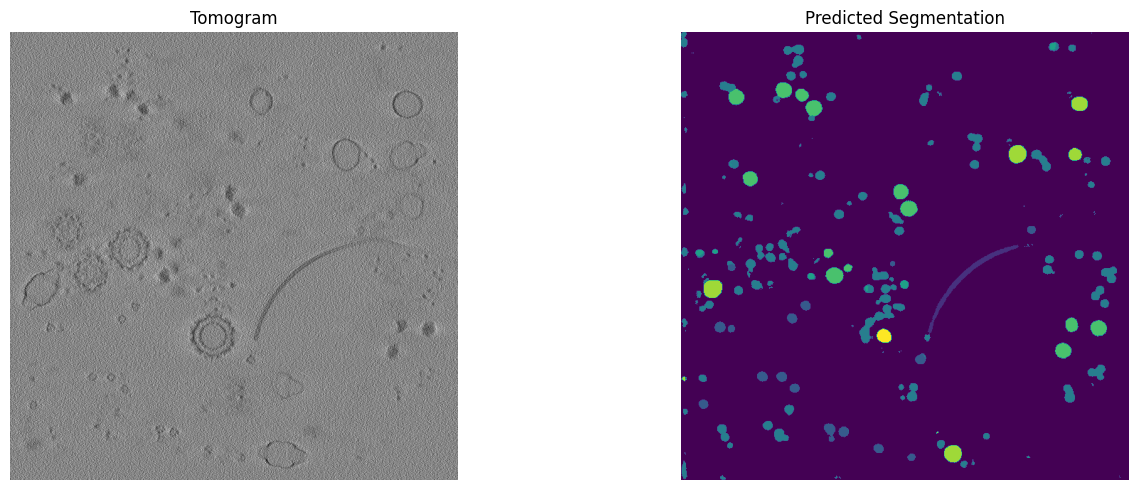

In [5]:
# Plot the images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Tomogram')
plt.imshow(train_tomogram[90,],cmap='gray')
plt.axis('off')

# Original Image
plt.subplot(1, 2, 2)
plt.title('Predicted Segmentation')
plt.imshow(train_target[90,])
plt.axis('off')

plt.tight_layout()
plt.show()

#### Step 4: Measure Protein Coordinates from Segmentation Maps

In this step, we aim to extract protein coordinates from the segmentation masks generated in previous steps. These masks represent the predicted locations of proteins within the tomograms. To accurately identify and localize these proteins, we perform a series of filtering and extraction processes based on the anticipated size of the proteins.

**Filtering Potential Candidates by Size:** <br>
We start by filtering out objects from the segmentation masks that do not match the expected size range of the proteins. This ensures that only objects with a size within a similar magnitude to the anticipated protein size are considered as potential candidates.

**Measuring 3D Coordinates with Center of Mass:**<br>
For each remaining object, we calculate the center of mass. This step helps in pinpointing the exact coordinates within the 3D volume where the protein is most likely located. The center of mass provides a reliable metric for localization, ensuring that the coordinates correspond to the most central point of the segmented object.

For those interested, the equivalent CLI command is `step4 localize`. To see all available options, you can run `step4 localize --help`.

In [6]:
from deepfindET.entry_points import step4

# Session ID for the Output Picks
picks_session_id = '1'

# Session ID and Name for the Segmentation Masks Predicted By DeepFindET
segmentation_session_id = '1'
segmentation_name = 'predict' 

# Minimum Size Based on the Radius of the Config that Qualifies Candidates as Real Picks
min_protein_size = 0.4  

# Path to the config project
path_output = 'overlay_10439/ExperimentRuns'

In [7]:
# Users Can Either Specify Runs They'd Like to Run Inference on, Or By Default Run Inference on the Entire Dataset
run_ids = '16177,16180'

# Extract Protein Coordinates from the Segmentation Masks
step4.convert_segmentations_to_coordinates(
    config,                                 # CoPick Configuration File specifying paths and parameters for the project
    n_class,                                # Number of classes in the segmentation masks
    user_id,                                # Identifier of the user or project running the coordinate extraction
    picks_session_id,                       # Session identifier for the output protein coordinate picks
    segmentation_session_id,                # Session identifier for the segmentation masks used as input
    segmentation_name=segmentation_name,    # Name assigned to the segmentation mask files for identification
    voxel_size=voxel_size,                  # Voxel size of the tomogram used to calculate the coordinates
    path_output=path_output,                # Directory path where the output protein coordinates will be saved
    min_protein_size=min_protein_size,      # Minimum size threshold for filtering out small, irrelevant segmentation objects
    tomo_ids=run_ids                        # List of tomogram IDs to extract protein coordinates from
)


Localization Parameters:  {
    "input": {
        "predict_config": "config_10439.json",
        "voxel_size": 10,
        "user_id": "deepfindET",
        "segmentation_name": "predict",
        "segmentation_session_id": "1"
    },
    "output": {
        "user_id": "deepfindET",
        "picks_session_id": "1",
        "min_protein_size": 0.4,
        "path_output": "overlay_10439/ExperimentRuns",
        "starfile_write_path": null,
        "tomo_ids": "16177,16180"
    }
} 

Processing Run: 16177 (0)/2


100%|█████████████████████████████████████████████| 9/9 [00:06<00:00,  1.34it/s]


Processing Run: 16180 (1)/2


100%|███████████████████████████████████████████| 10/10 [00:07<00:00,  1.40it/s]

Extraction of Particle Coordinates Complete!


#### (Optional, Visualize the Picks)

We've been able to convert the segmentation maps into 3D coordinates. Let's display these coordinates as a scatter plot. While here I'm displaying the results with Matplotlib, there is a great ChimeraX extension that generalizes this visualization process in a seemless manner. 

In [8]:
# Manually Specify Specific Run
# Define a specific Run-ID manually. This is useful for extracting volumes for a specific run.
runID = '16180'

# Retrieve the specific run object from CoPick using the manually specified Run-ID.
copick_root = copick.from_file(config)
copick_run = copick_root.get_run(runID)

# Retrieve the tomogram associated with the specified Run-ID from the CoPick project.
# The function get_copick_tomogram extracts the tomogram data, using the voxel size, algorithm, and Run-ID.
train_tomogram = copick_tools.get_copick_tomogram(
    copick_root,                # The root object for the CoPick project, containing all runs and associated data.
    voxelSize=voxel_size,       # The voxel size to be used for retrieving the tomogram.
    tomoAlgorithm='wbp',        # The reconstruction algorithm used for the tomogram, e.g., 'wbp' (weighted back projection).
    tomoID=runID                # The specific Run-ID for which the tomogram is being retrieved.
)

In [9]:
def get_copick_coordinates(copick_run,        # CoPick run object containing the segmentation data
                           name: str,         # Name of the object or protein for which coordinates are being extracted
                           user_id: str,      # Identifier of the user or project that generated the picks
                           voxel_size: float  # Voxel size of the tomogram, used for scaling the coordinates
                           ):
                           
    # Retrieve the pick points associated with the specified object and user ID
    points = copick_run.get_picks(object_name=name, user_id=user_id)[0].points
    
    # Initialize an array to store the coordinates
    nPoints = len(points)                      # Number of points retrieved
    coordinates = np.zeros([len(points), 3])   # Create an empty array to hold the (z, y, x) coordinates

    # Iterate over all points and convert their locations to coordinates in voxel space
    for ii in range(nPoints):
        coordinates[ii,] = [points[ii].location.z / voxel_size,   # Scale z-coordinate by voxel size
                            points[ii].location.y / voxel_size,   # Scale y-coordinate by voxel size
                            points[ii].location.x / voxel_size]   # Scale x-coordinate by voxel size
    
    # Return the array of coordinates
    return coordinates


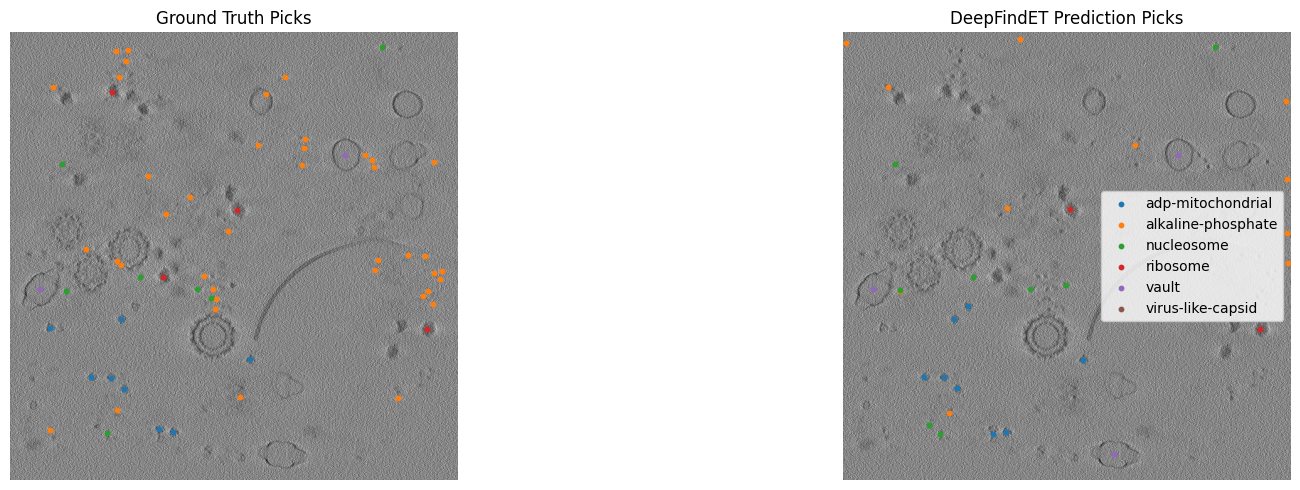

In [10]:
# Tomogram Slice to Display
volSlice = 90
# Labels for All the Proteins Present in the Tomogram
object_names = ['adp-mitochondrial','alkaline-phosphatase', 'nucleosome', 'ribosome', 'vault', 'virus-like-capsid']

# Plot the images
plt.figure(figsize=(20, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Ground Truth Picks')
plt.imshow(train_tomogram[volSlice,],cmap='gray')
plt.axis('off')

# Plot each object from ground truth data
for name in object_names:
    # Retrieve the pick points for the current object from ground truth data
    points = copick_run.get_picks(object_name=name, user_id='data-portal')[0].points
    
    nPoints = len(points)                    # Number of points retrieved
    coordinates = np.zeros([len(points), 3]) # Initialize an array for the coordinates

    # Convert the locations of each point to voxel space coordinates
    for ii in range(nPoints):
        coordinates[ii,] = [points[ii].location.z / voxel_size,  # Scale z-coordinate by voxel size
                            points[ii].location.y / voxel_size,  # Scale y-coordinate by voxel size
                            points[ii].location.x / voxel_size]  # Scale x-coordinate by voxel size
    
    # Find points that are closest to the slice at Z = volSlice (90)
    slice_proximity_threshold = 3  # Threshold for how close a point needs to be to the slice to be considered
    close_points = coordinates[np.abs(coordinates[:, 0] - volSlice) <= slice_proximity_threshold]

    # Plot the points on the image
    plt.scatter(close_points[:, 2], close_points[:, 1], label=name, s=10)

# Predicted Picks Image
plt.subplot(1, 2, 2)
plt.title('DeepFindET Prediction Picks')
plt.imshow(train_tomogram[volSlice,],cmap='gray')
plt.axis('off')

# Plot each object from DeepFindET predictions
for name in object_names:
    points = copick_run.get_picks(object_name = name, user_id = 'deepfindET')[0].points
    
    nPoints = len(points)
    coordinates = np.zeros([len(points), 3])
    for ii in range(nPoints):
        coordinates[ii,] = [points[ii].location.z/voxel_size, 
                            points[ii].location.y/voxel_size, 
                            points[ii].location.x/voxel_size]
    
    # Find points closest to the slice Z = 90
    slice_proximity_threshold = 3  # Adjust this threshold as needed
    close_points = coordinates[np.abs(coordinates[:, 0] - volSlice) <= slice_proximity_threshold]

    # Plot these points
    plt.scatter(close_points[:, 2], close_points[:, 1], label=name, s=10)


plt.legend()
plt.tight_layout()
plt.show()

#### Step 5: Evaluate the Measured Coordiantes 

In the final step of evaluating measured coordinates, we use metrics such as recall, precision, accuracy, and F1 score to assess the performance of the trained model. These metrics help us understand how well the model identifies and localizes proteins or particles within the dataset. Refer to the cell bellow to get a description of all the metrics.

When working with synthetic data, where ground truths are certain, these metrics provide a clear indication of model performance, with high values reflecting a model that accurately identifies and localizes proteins as defined by the ground truth. 

In experimental data, however, these metrics require more careful interpretation. For example, a high recall might indicate that the model is identifying true proteins that were not labeled during manual annotation, while precision could reflect the challenge of validating these detections against potentially incomplete ground truths.

In [11]:
from deepfindET.utils import evaluate

# Iterate through each object name for evaluation
for name in object_names:

    # Retrieve the predicted coordinates from DeepFindET for the current object
    nn_coords = get_copick_coordinates(copick_run, name, 'deepfindET', voxel_size) 

    # Retrieve the ground truth coordinates from the data portal for the current object
    gt_coords = get_copick_coordinates(copick_run, name, 'data-portal', voxel_size)

    # Print the evaluation results for the current object
    print(f'Evaluation for {name}: ')
    
    # Compute and display the evaluation metrics (e.g., F1 score, recall, precision) comparing the ground truth to the predicted coordinates
    print(evaluate.compute_metrics(gt_coords, nn_coords, 4))
    print()  # Print a blank line for better readability between evaluations


Evaluation for adp-mitochondrial: 
{'precision': 0.8195876288659794, 'recall': 0.6794871794871795, 'f1_score': 0.7429906542056075, 'accuracy': 0.5910780669144982, 'true_positives': 159, 'false_positives': 35, 'false_negatives': 75}

Evaluation for alkaline-phosphate: 
{'precision': 0.20238095238095238, 'recall': 0.05519480519480519, 'f1_score': 0.08673469387755102, 'accuracy': 0.04533333333333334, 'true_positives': 68, 'false_positives': 268, 'false_negatives': 1164}

Evaluation for nucleosome: 
{'precision': 0.8008298755186722, 'recall': 0.8853211009174312, 'f1_score': 0.8409586056644881, 'accuracy': 0.7255639097744361, 'true_positives': 193, 'false_positives': 48, 'false_negatives': 25}

Evaluation for ribosome: 
{'precision': 0.9397590361445783, 'recall': 0.8863636363636364, 'f1_score': 0.912280701754386, 'accuracy': 0.8387096774193549, 'true_positives': 78, 'false_positives': 5, 'false_negatives': 10}

Evaluation for vault: 
{'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0, 'accur

### Metric Descriptions and Equations

**Recall:** The ability of the model to find all the relevant cases within a dataset. It is the ratio of correctly predicted positive observations to all the observations in the actual class.

$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

**Precision:** The ability of the model to return only relevant instances. It is the ratio of correctly predicted positive observations to the total predicted positives.

$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $

**Accuracy:** The ratio of correctly predicted instances to the total instances. It measures the overall effectiveness of the model.

$ \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Population}} $

**F1 Score:** A measure of a test's accuracy that considers both the precision and the recall. The F1 score is the harmonic mean of precision and recall.

$ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

**True Positives (TP):** Instances where the model correctly predicts the positive class.

**False Negatives (FN):** Instances where the model incorrectly predicts the negative class.

**False Positives (FP):** Instances where the model incorrectly predicts the positive class.